# Dataset 
The Boston Housing data set contains information about the housing values in suburbs of Boston. This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository.

In [1]:

%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")
clr = ['blue', 'green', 'red','darkgrey','darkolivegreen','firebrick','indigo' ,'wheat4','lightblue','magenta','tan4','teal','tomato4']

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
boston.keys()

dict_keys(['target', 'data', 'DESCR', 'feature_names'])

In [3]:
boston.data.shape
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
# Print description of Boston housing data set
# print(boston.DESCR)

In [5]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
bos.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


# Exploratory Data Analysis 

In [6]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
sns.set_palette("husl")

labels = { 'CRIM' : 'crime rate','ZN': 'proportion of residential lots','INDUS': 'proportion of non-retail business',\
    'NOX':'nitric oxides concentration','RM':'Rooms', 'AGE':'Units built pre-1940' , 'DIS' : 'Dist to Emp Centres', \
    'RAD' : 'Access to HWays','PTRATIO' :'Pupil/Teacher Ratio','LSTAT' :'percent lower status'}

def plotlabel(g,n):
    for i in range(n):
        xlabel = g.axes[0][i].get_xlabel()
        if xlabel in labels.keys():
            g.axes[0][i].set_xlabel(labels[xlabel])
       

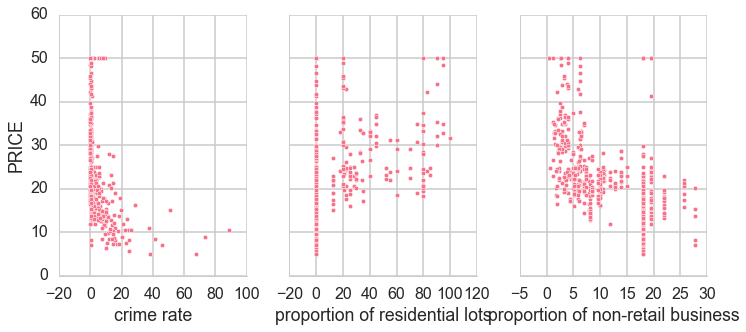

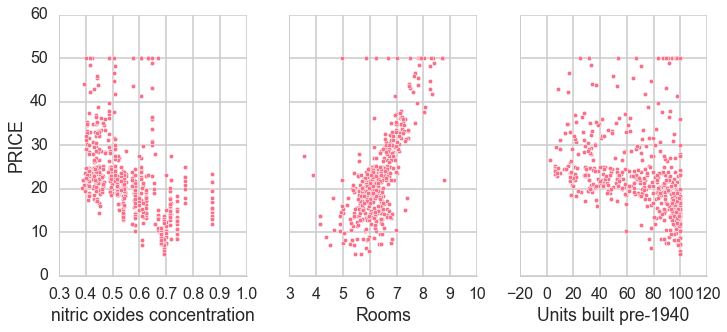

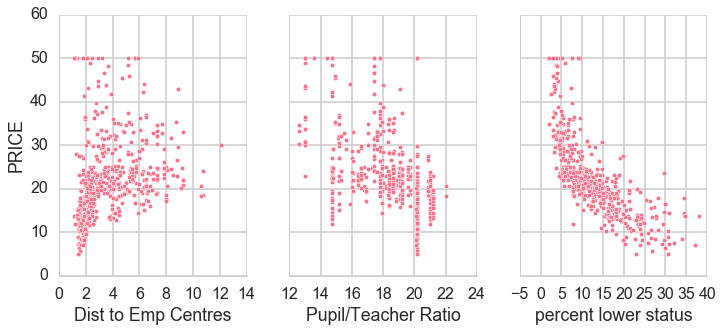

In [8]:

g = sns.pairplot(bos, x_vars=["CRIM", "ZN","INDUS"], y_vars=["PRICE"],size=5, aspect=.7,kind="scatter");
plotlabel(g,3)

g=sns.pairplot(bos, x_vars=["NOX","RM","AGE"], y_vars=["PRICE"],size=5, aspect=.7, kind="scatter");
plotlabel(g,3)
g=sns.pairplot(bos, x_vars=["DIS","PTRATIO","LSTAT"], y_vars=["PRICE"],size=5, aspect=.7, kind="scatter");
plotlabel(g,3)
plt.show()


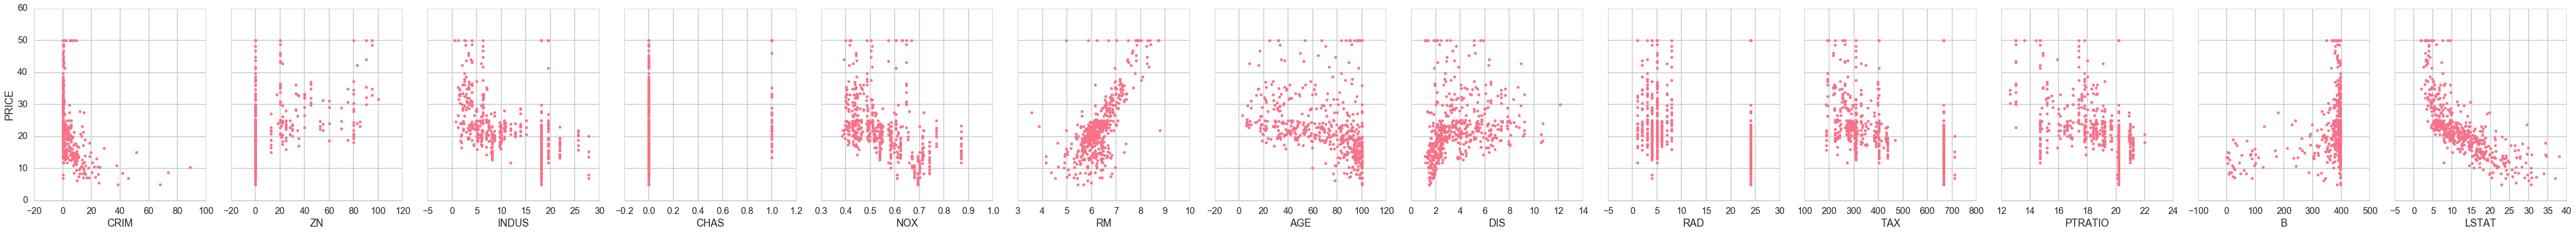

In [9]:
g = sns.PairGrid(bos,size=6,aspect=0.8,y_vars=['PRICE'],x_vars=['CRIM', 'ZN','INDUS' ,'CHAS' ,'NOX' ,'RM', 'AGE' ,'DIS','RAD' ,'TAX' ,'PTRATIO' ,'B' ,'LSTAT'])
g = g.map(plt.scatter)



# Observations 

* Pricing is positively correlated with #RM (Rooms) as one would expect. More rooms imply more square footage.

* Pricing also shows negative correlation with LSTAT (which is an indicator of socio economic status) and crime rate 

* Pricing also shows a (weak) negative  correlation with PTRATIO 



/Applications/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


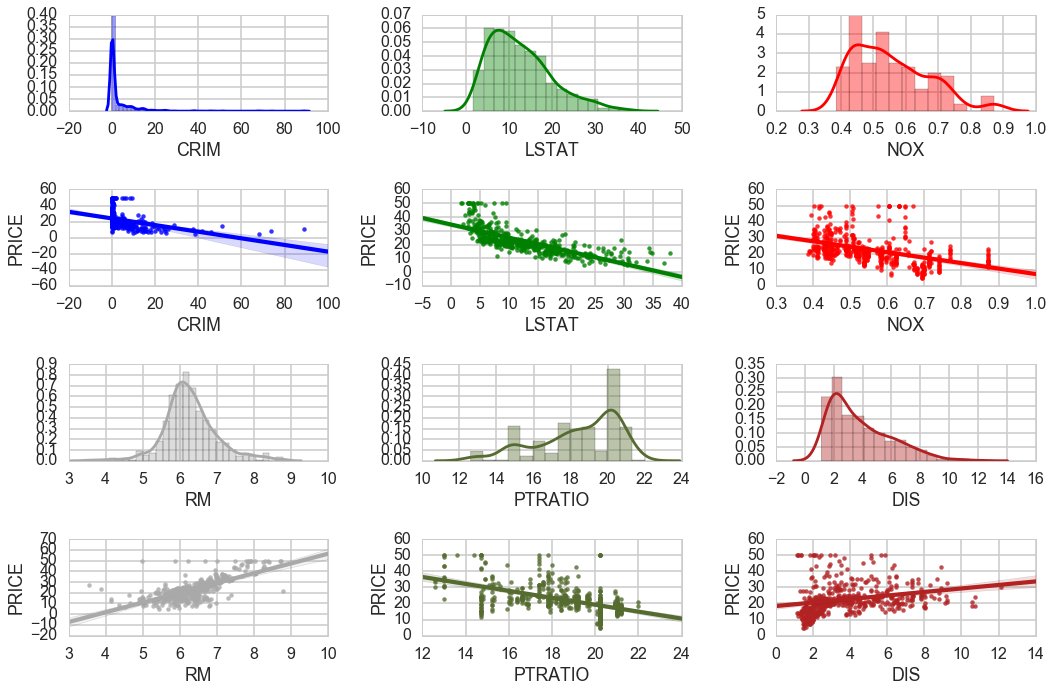

In [10]:
# lets look at the distribution of the key features
f, axes = plt.subplots(4, 3, figsize=(15, 10))

c = ["CRIM","LSTAT","NOX","RM","PTRATIO","DIS"]

for i, var in enumerate(c):
    j = int(i/3)
    sns.distplot( bos[var] , color=clr[i], ax=axes[j*2, i%3])
    sns.regplot( (bos[var]) ,bos['PRICE'] ,color=clr[i], ax=axes[j*2+1, i%3])
f.tight_layout()


# Observations 

* Based on the histogram we see that RM represents normal distribution . LSTAT , DIS and PTRATio also have a somewhat normal distribution with some skew . LSTAT,DIS show a +ve skew and PTRATIO shows a -ve skew

* Log transformation of LSTAT represents close to normal distribution . Transformation of DIS , PTRATIO doesn't give us a normal distribution.

* Looking at the regression plots we a see a strong positive correlation between RM and PRICE and  negative correlation with PTRATIO, LSTAT , NOX 


/Applications/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


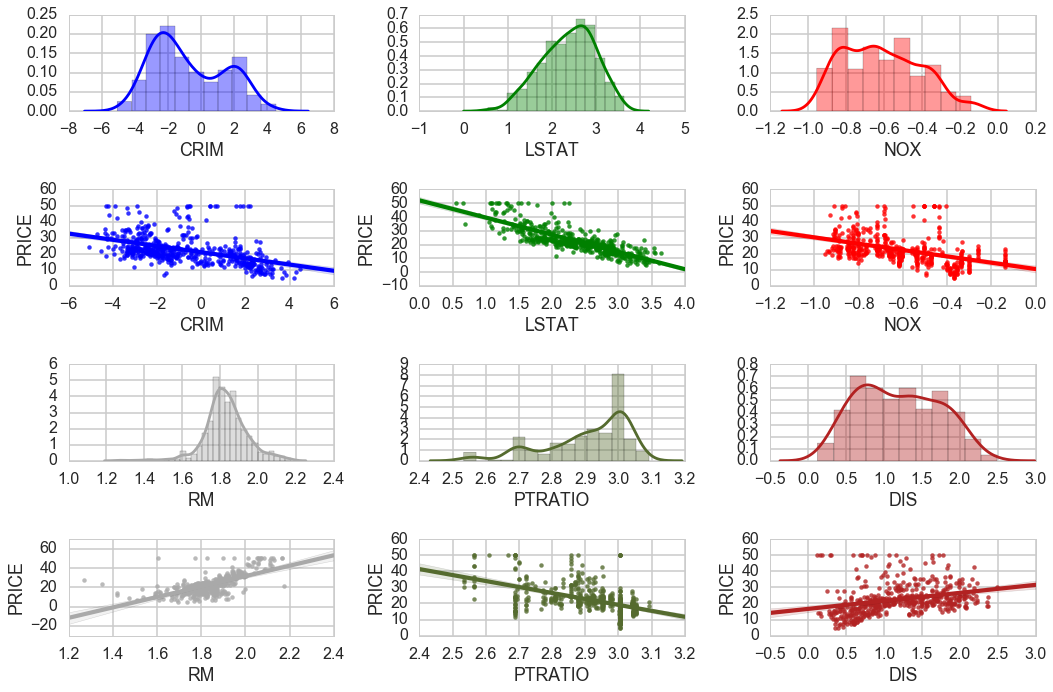

In [11]:
f, axes = plt.subplots(4, 3, figsize=(15, 10))

c = ["CRIM","LSTAT","NOX","RM","PTRATIO","DIS"]

for i, var in enumerate(c):
    j = int(i/3)
    sns.distplot( np.log(bos[var]) , color=clr[i], ax=axes[j*2, i%3])
    sns.regplot( np.log(bos[var]) ,bos['PRICE'] ,color=clr[i], ax=axes[j*2+1, i%3])
f.tight_layout()



* Log transformation of LSTAT improves the regression fit while it does not help the other features 


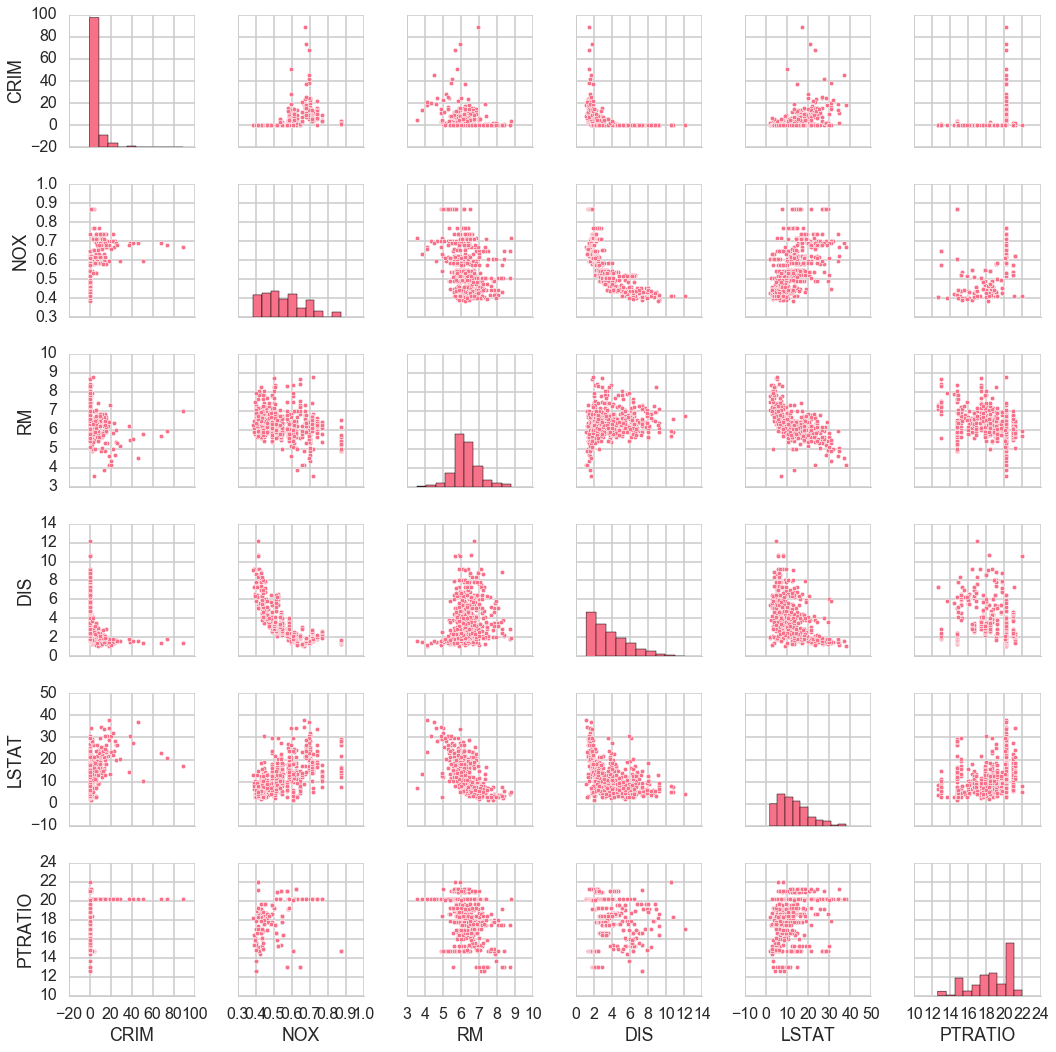

In [12]:
# lets look at the correlation / relationship among the features 

data = bos[['CRIM','NOX','RM','DIS','LSTAT','PTRATIO']]

sns.pairplot(data)


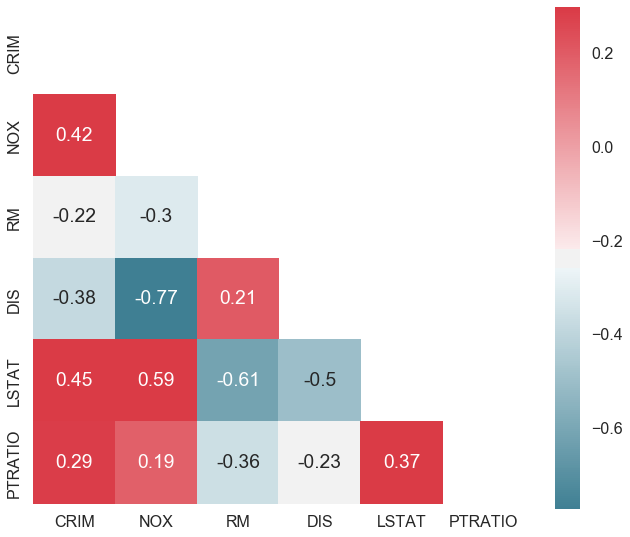

In [13]:
# lets look at the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

with sns.axes_style("white"):
    ax = sns.heatmap(corr, cmap=cmap,mask=mask, vmax=.3, square=True,annot=True)

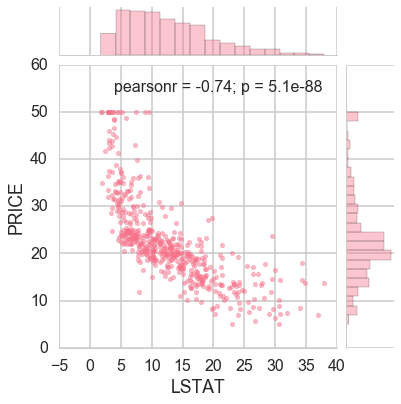

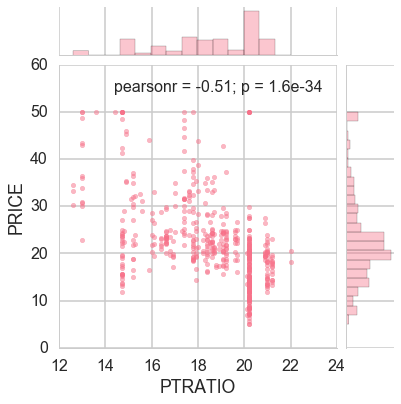

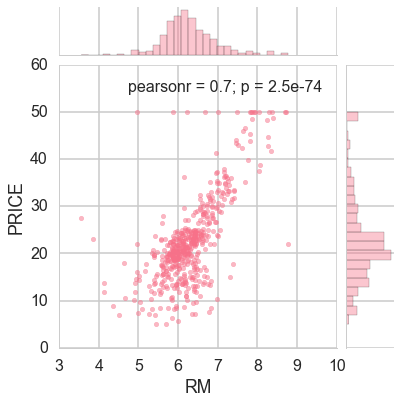

In [14]:
# jointplot (with histograms aside):
sns.jointplot(bos['LSTAT'], bos['PRICE'], kind='scatter', joint_kws={'alpha':0.5})
sns.jointplot(bos['PTRATIO'], bos['PRICE'], kind='scatter', joint_kws={'alpha':0.5})
sns.jointplot(bos['RM'], bos['PRICE'], kind='scatter', joint_kws={'alpha':0.5})

# Observations 

* CRIM , LSTAT , and PTRATIO are correlated . This makes sense as they are all tied to the socio-economic status 

* NOX is negatively correlated with DIS . This again makes sense as pollution/NOX is more with greater access to the freeways



# Regression Model

In [23]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import scipy.stats as ss

def GetModelStats(reg,X,Y):
    coeffs = np.append(reg.intercept_,reg.coef_)
    predictions = reg.predict(X)
    newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
    MSE = (sum((Y-predictions)**2))/(len(newX)-len(newX.columns))

    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = coeffs / sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,5)
    coeffs = np.round(coeffs,4)

    mstats = pd.DataFrame()
    mstats["Coefficients"],mstats["Standard Errors"],mstats["t values"],mstats["Probabilites"] = [coeffs,sd_b,ts_b,p_values]
    print(mstats)
    return mstats

# This creates a LinearRegression object
reg = LinearRegression()
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']


In [22]:

# Lets build a model with just One  parameter PTRATIO  
X1 = bos[['PTRATIO']]

# Use all 13 predictors to fit linear regression model
reg.fit(X1,Y)

ms = GetModelStats(reg,X1,Y)
R2 = r2_score(Y,reg.predict(X1))
print("R2 score is "+str(R2))



   Coefficients  Standard Errors  t values  Probabilites
0       62.3446            3.029    20.581           0.0
1       -2.1572            0.163   -13.233           0.0
R2 score is 0.257847318009


/Applications/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


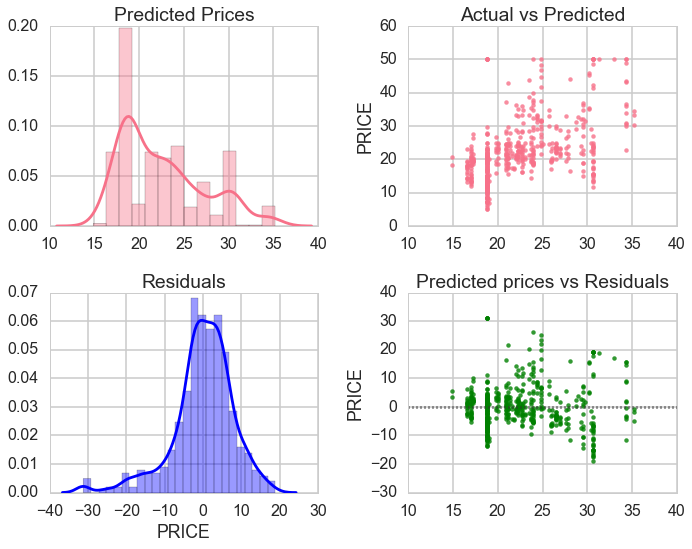

In [17]:
# Histogram of all predicted prices

predicted = reg.predict(X)

f, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.distplot(predicted,ax=axes[0,0])
axes[0,0].set_title("Predicted Prices")
sns.regplot(predicted,Y,fit_reg=False,ax=axes[0,1])
axes[0,1].set_title("Actual vs Predicted")
sns.distplot(predicted-Y,ax=axes[1,0],color="blue")
axes[1,0].set_title("Residuals")
sns.residplot(predicted,Y,ax=axes[1,1],color="green")
axes[1,1].set_title("Predicted prices vs Residuals")

f.tight_layout()
plt.show()

# Model Evaluation (Regression using just one feature - PTRATIO)
Using just the PTRATIO to predict the housing price , we find that the regression model doesnot capture the variation of the target variable. The R2 score is quite low (0.25) and there are lot of differences between the predicted and actual housing prices


# Regression Model using all features

In [25]:
# Use all 13 predictors to fit linear regression model
reg.fit(X,Y)
y_pred = reg.predict(X)
R2 = r2_score(Y,y_pred)
print("R2 score is :" +str(R2))
print(np.sqrt(mean_squared_error(Y,y_pred)))
print('Intercept coefficient: {}'.format(reg.intercept_))
print('Number of coefficients: {}'.format(len(reg.coef_)))

# The coefficients
pd.DataFrame({'features': X.columns, 'Coefficients': reg.coef_})[['features', 'Coefficients']]


R2 score is :0.740607742865
4.67950630064
Intercept coefficient: 36.491103280363404
Number of coefficients: 13


,features,Coefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [26]:
ms = GetModelStats(reg,X,Y)

    Coefficients  Standard Errors  t values  Probabilites
0        36.4911            5.104     7.149       0.00000
1        -0.1072            0.033    -3.276       0.00112
2         0.0464            0.014     3.380       0.00078
3         0.0209            0.061     0.339       0.73459
4         2.6886            0.862     3.120       0.00191
5       -17.7958            3.821    -4.658       0.00000
6         3.8048            0.418     9.102       0.00000
7         0.0008            0.013     0.057       0.95469
8        -1.4758            0.199    -7.398       0.00000
9         0.3057            0.066     4.608       0.00001
10       -0.0123            0.004    -3.278       0.00112
11       -0.9535            0.131    -7.287       0.00000
12        0.0094            0.003     3.500       0.00051
13       -0.5255            0.051   -10.366       0.00000


In [27]:
print("Residual Sum of Sq : " + str(np.sum((Y - y_pred) ** 2)))
print("Explained Sum of Sq : " + str(np.sum(y_pred - np.mean(Y)) ** 2))

Residual Sum of Sq : 11080.276284149868
Explained Sum of Sq : 8.69056631064e-23


/Applications/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


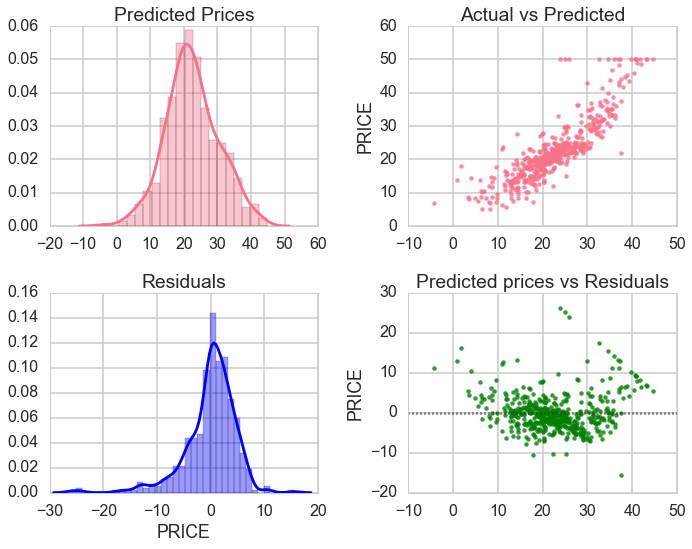

In [28]:
# Histogram of all predicted prices

predicted = reg.predict(X)

f, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.distplot(predicted,ax=axes[0,0])
axes[0,0].set_title("Predicted Prices")
sns.regplot(predicted,Y,fit_reg=False,ax=axes[0,1])
axes[0,1].set_title("Actual vs Predicted")
sns.distplot(predicted-Y,ax=axes[1,0],color="blue")
axes[1,0].set_title("Residuals")
sns.residplot(predicted,Y,ax=axes[1,1],color="green")
axes[1,1].set_title("Predicted prices vs Residuals")

f.tight_layout()
plt.show()



# Model Evaluation (Regression using all features)
From the model / R2 score we see that the model captures the variation in target (housing) quite well . The histogram of the residuals has a near normal distribution 


# Train Test  Split

/Applications/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


mean squared error for the training set: 22.54528073883557
mean squared error for the test set: 21.54021894393144


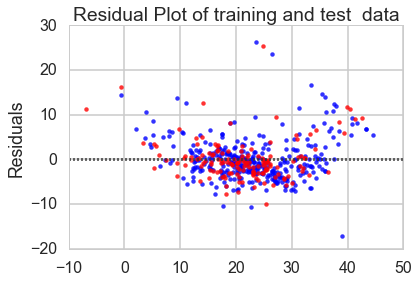

In [29]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

reg.fit(X_train,y_train)
Y_testpredict = reg.predict(X_test)
Y_trainpredict = reg.predict(X_train)
mse_train = np.mean((y_train - Y_trainpredict)**2)
mse_test = np.mean((y_test - Y_testpredict)**2)
print('mean squared error for the training set: {}'.format(mse_train))
print('mean squared error for the test set: {}'.format(mse_test))

sns.residplot(Y_trainpredict ,y_train,color='b')
sns.residplot(Y_testpredict ,y_test,color='r')

plt.title('Residual Plot of training and test  data')
plt.ylabel('Residuals')
plt.show()



/Applications/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


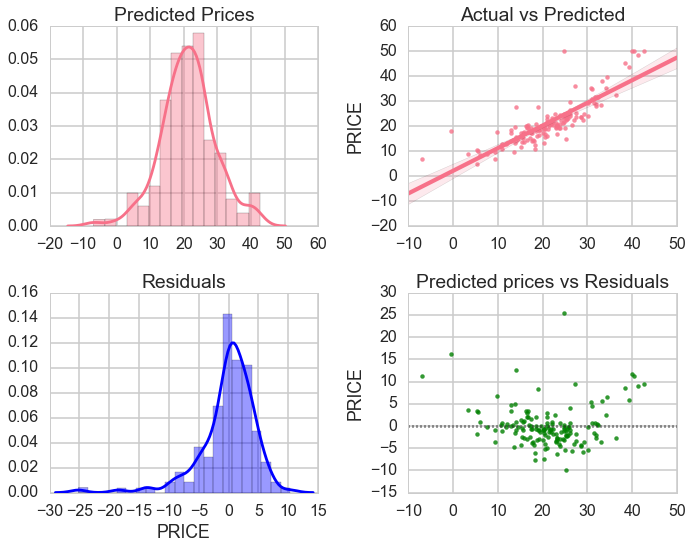

In [32]:


f, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.distplot(Y_testpredict,ax=axes[0,0])
axes[0,0].set_title("Predicted Prices")
sns.regplot(Y_testpredict,y_test,ax=axes[0,1])
axes[0,1].set_title("Actual vs Predicted")
sns.distplot(Y_testpredict-y_test,ax=axes[1,0],color="blue")
axes[1,0].set_title("Residuals")
sns.residplot(Y_testpredict,y_test,ax=axes[1,1],color="green")
axes[1,1].set_title("Predicted prices vs Residuals")

f.tight_layout()
plt.show()

Using the test train split , we see the low value for residuals for the test data and good fit for the target variable


# Feature Selection with Lasso Regression 

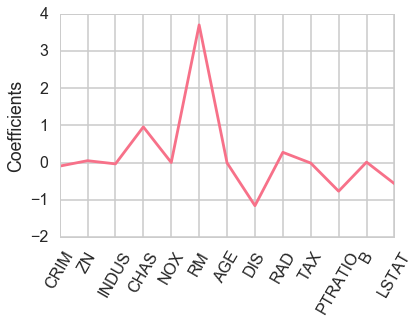

In [53]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=True)

lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_coeff = lasso.coef_
_ = plt.plot(range(len(boston.feature_names)), lasso_coef)
_ = plt.xticks(range(len(boston.feature_names)), boston.feature_names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()


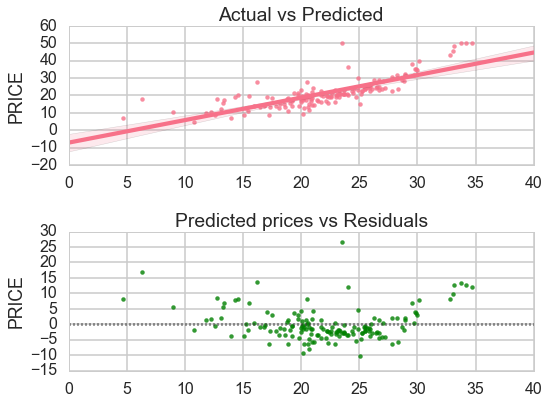

In [56]:

f, axes = plt.subplots(2, figsize=(8, 6))

sns.regplot(lasso_pred,y_test,ax=axes[0])
axes[0].set_title("Actual vs Predicted")
sns.residplot(lasso_pred,y_test,ax=axes[1],color="green")
axes[1].set_title("Predicted prices vs Residuals")

f.tight_layout()
plt.show()

# Parameter Tuning with GridSearchCV 

In [71]:
from sklearn.grid_search import GridSearchCV 
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=5)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
# Print the tuned parameters and score
print("Tuned  Regression Parameters: {}".format(grid.best_params_)) 
print("Best score is {}".format(grid.best_score_))
print("Residual sum of squares: %.2f" % np.mean((y_pred - y_test) ** 2))



Tuned  Regression Parameters: {'copy_X': True, 'normalize': True, 'fit_intercept': True}
Best score is 0.6883243123348926
Residual sum of squares: 21.54


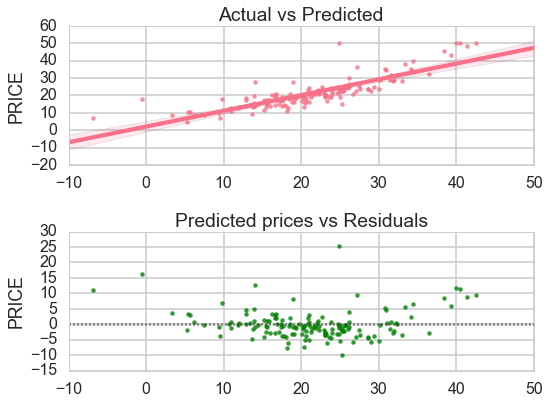

In [64]:

f, axes = plt.subplots(2, figsize=(8, 6))

sns.regplot(y_pred,y_test,ax=axes[0])
axes[0].set_title("Actual vs Predicted")
sns.residplot(y_pred,y_test,ax=axes[1],color="green")
axes[1].set_title("Predicted prices vs Residuals")

f.tight_layout()
plt.show()



In [73]:
# The coefficients
bmodel = LinearRegression(grid.best_params_)
bmodel.fit(X_train, y_train)
y_pred = bmodel.predict(X_test)
print('Intercept coefficient: {}'.format(bmodel.intercept_))
pd.DataFrame({'features': X.columns, 'Coefficients': bmodel.coef_})[['features', 'Coefficients']]

Intercept coefficient: 31.682148582134218


,features,Coefficients
0,CRIM,-0.132774
1,ZN,0.035781
2,INDUS,0.049945
3,CHAS,3.121277
4,NOX,-15.469846
5,RM,4.048727
6,AGE,-0.010752
7,DIS,-1.386998
8,RAD,0.242354
9,TAX,-0.008691
